In [63]:
%matplotlib inline
import numpy as np
import pandas as pd
import scipy
import sklearn
import matplotlib.pyplot as plt
import seaborn as sns

In [64]:
# Grab and process the raw data.

path1 = ("C:/Users/aath/Dropbox/MAEN/Thankful/Data/sentiments/sentiment labelled sentences/amazon_cells_labelled.csv")
image_path1 = ("C:/Users/aath/Dropbox/MAEN/Thankful/Library/Images/1280px-LowSensitivity_HighSpecificity_1400x1050.png")
image_path2 = ("C:/Users/aath/Dropbox/MAEN/Thankful/Library/Images/Sensitivity_Specificity.jpg")
image_path3 = ("C:/Users/aath/Dropbox/MAEN/Thankful/Library/Images/train_test_dataset.jpg")
df_az = pd.read_csv(path1)

In [65]:
# Get an overview of data
df_az.head()

,message,sentiment
0,So there is no way for me to plug it in here i...,0
1,"Good case, Excellent value.",1
2,Great for the jawbone.,1
3,Tied to charger for conversations lasting more...,0
4,The mic is great.,1


In [66]:
# What is the polarity (positive vs negative) of feedbacks
print("Number of positive feedback: ", df_az[df_az["sentiment"]==1].count()["sentiment"])
print("Number of negative feedback: ", df_az[df_az["sentiment"]==0].count()["sentiment"])

Number of positive feedback:  500
Number of negative feedback:  500


In [67]:
keywords = ['nice', 'good', 'winner', 'great', 'love', 'excellent', 'recommended']

for key in keywords:
    # Note that we add spaces around the key so that we're getting the word,
    # not just pattern matching.
    df_az[str(key)] = df_az.message.str.contains(
        ' ' + str(key) + ' ',
        case=False
    )

In [68]:
df_az['allcaps'] = df_az.message.str.isupper()

In [69]:
df_az.head(3)

,message,sentiment,nice,good,winner,great,love,excellent,recommended,allcaps
0,So there is no way for me to plug it in here i...,0,False,False,False,False,False,False,False,False
1,"Good case, Excellent value.",1,False,False,False,False,False,True,False,False
2,Great for the jawbone.,1,False,False,False,False,False,False,False,False


In [70]:
df_az['sentiment'] = (df_az['sentiment'] == 1)
# Note that if you run this cell a second time everything will become false.
# So... Don't.

In [71]:
df_az.head(2)

,message,sentiment,nice,good,winner,great,love,excellent,recommended,allcaps
0,So there is no way for me to plug it in here i...,False,False,False,False,False,False,False,False,False
1,"Good case, Excellent value.",True,False,False,False,False,False,True,False,False


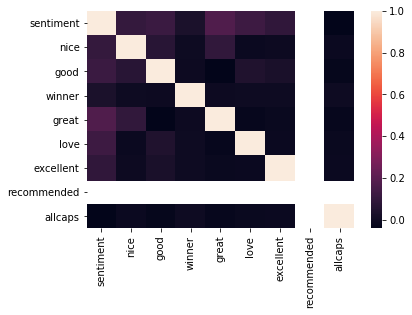

In [72]:
sns.heatmap(df_az.corr())

In [73]:
data = df_az[keywords + ['allcaps']]
target = df_az['sentiment']

In [74]:
data.head(3)

,nice,good,winner,great,love,excellent,recommended,allcaps
0,False,False,False,False,False,False,False,False
1,False,False,False,False,False,True,False,False
2,False,False,False,False,False,False,False,False


In [75]:
# Our data is binary / boolean, so we're importing the Bernoulli classifier.
from sklearn.naive_bayes import BernoulliNB

# Instantiate our model and store it in a new variable.
bnb = BernoulliNB()

# Fit our model to the data.
bnb.fit(data, target)

# Classify, storing the result in a new variable.
y_pred = bnb.predict(data)

# Display our results.
print("Number of mislabeled points out of a total {} points or Error I + Error II : {}".format(
    data.shape[0],
    (target != y_pred).sum()
))

Number of mislabeled points out of a total 1000 points or Error I + Error II : 415


In [76]:
from sklearn.metrics import confusion_matrix
conf_matrix = confusion_matrix(target, y_pred)
conf_Dframe = pd.DataFrame (conf_matrix)

In [77]:
conf_Dframe.as_matrix(columns=None)

array([[487,  13],
       [402,  98]], dtype=int64)

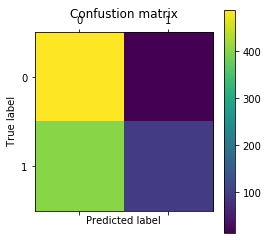

In [78]:
plt.matshow(conf_matrix)
plt.title('Confustion matrix')
plt.colorbar()
plt.ylabel(' True label')
plt.xlabel('Predicted label')
plt.show()

In [79]:
print ("Total observation:", conf_Dframe.values.sum())
print ("True Positive:", conf_Dframe.iloc[0,0])
print ("False Positive, Type I Error or False Alarm:", conf_Dframe.iloc[0,1])
print ("True Negative:", conf_Dframe.iloc[1,1])
print ("False Negative, Type II Error or Miss:", conf_Dframe.iloc[1,0])
print ("Sensitivity or Precision:", (conf_Dframe.iloc[1,0]/(conf_Dframe.iloc[0,0]+conf_Dframe.iloc[1,0])))
print ("Specificity = Proportion of Ham correctly identified:", (conf_Dframe.iloc[0,1]/(conf_Dframe.iloc[0,1]+conf_Dframe.iloc[1,1])))
print('Total Success Rate:' + str(bnb.fit(data, target).score(data, target)))

Total observation: 1000
True Positive: 487
False Positive, Type I Error or False Alarm: 13
True Negative: 98
False Negative, Type II Error or Miss: 402
Sensitivity or Precision: 0.452193475816
Specificity = Proportion of Ham correctly identified: 0.117117117117
Total Success Rate:0.585


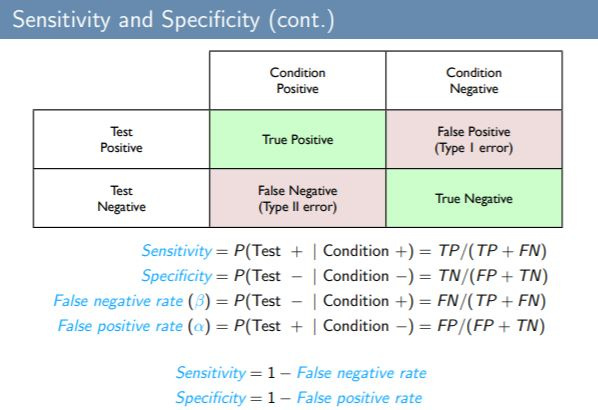

In [80]:
from IPython.display import Image
Image(filename=image_path2, width=600, height=600)

In [81]:
# Test your model with different holdout groups.

from sklearn.model_selection import train_test_split

# Use train_test_split to create the necessary training and test groups
# The parameter test_size (as well as training_size) allows specifying the percentage of elements to put into
# the test/training set. In this case, the ratio is 80 percent for training and 20 percent for the test phase.
# Another important parameter is random_state which can accept a NumPy RandomState generator or an integer seed. 
# In many cases, it's important to provide reproducibility for the experiments, 
# so it's also necessary to avoid using different seeds and, consequently, different random splits:


X_train, X_test, y_train, y_test = train_test_split(data, target, test_size=.20, random_state=100)
print('With 80% training and 20% Holdout: ' + str(bnb.fit(X_train, y_train).score(X_test, y_test)))
print('Testing on Sample: ' + str(bnb.fit(data, target).score(data, target)))


With 80% training and 20% Holdout: 0.55
Testing on Sample: 0.585


In [82]:
# Decrease training portion to 20%

X_train, X_test, y_train, y_test = train_test_split(data, target, test_size=.20, random_state=100)
print('With 20% training and 80% Holdout: ' + str(bnb.fit(X_train, y_train).score(X_test, y_test)))
print('Testing on Sample: ' + str(bnb.fit(data, target).score(data, target)))

With 20% training and 80% Holdout: 0.55
Testing on Sample: 0.585


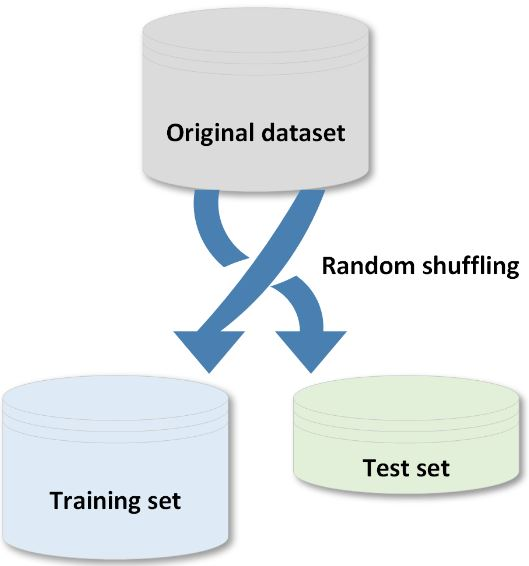

In [83]:
from IPython.display import Image
Image(filename=image_path3, width=300, height=300)

In [98]:
from sklearn.model_selection import cross_val_score
cross_val = cross_val_score(bnb, data, target, cv=500)

In [ ]:
cross_val

In [99]:
print('Std of 20 stratified fold:', np.std(np.array(cross_val)))

Std of 20 stratified fold: 0.202346237919


#  Challenge: Iterate and evaluate your classifier

<h2> Run 5 different cross validation using the same feacture vectors and record the std of the resutl</h2>

<h3>
cv = 5 and std = 1.5% 
cv = 10 and std = 3% 
cv = 100 and std = 8%
cv = 200 and std = 12%
cv = 500 and std = 18%

The standard variations for each holdouts or folds varies a lot and that may indicate overfitting. 
</h3>

<h2> Replace "works great" with "great" in feature vector to avoid any ambiguity and re-run the 5 different cross validation and record the std of the resutl</h2>

<h3>
The result are very simialr initially like previous scenario but at cv = 500 it increases a little. This indicates the feature vector has not improved.
</h3>